In [1]:
import numpy as np
import pandas as pd

In [10]:
path = "output/density_N=10.csv"

# df = pd.read_csv(path, delim_whitespace=True, header=None, names=["x", "y", "z"])
# rewrite the above line so that columns are labelled "x", "y", and "z"
# and the data is read from the file "output/temp.csv"
df = pd.read_csv(path, delim_whitespace=True, header=None, names=["x", "y", "z"])

In [6]:
print(df)

            x       y       z
0      0.4684 -1.4899  1.0166
1      0.2695  1.3302  0.8136
2     -1.3266  1.6824 -1.3614
3     -0.5252 -0.3550 -2.5882
4     -0.7266 -1.3826 -2.2965
...       ...     ...     ...
99995  0.5902  1.2760 -0.3592
99996  0.2924 -1.0180  0.8946
99997 -0.7630  0.4017  2.5502
99998 -2.5475  2.2540  0.4799
99999  0.4225  0.0082 -0.9123

[100000 rows x 3 columns]


<AxesSubplot:>

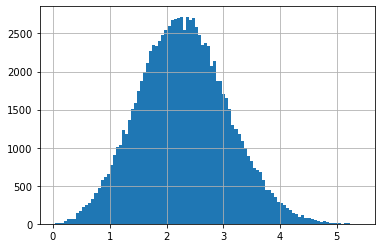

In [7]:
# add column with distance from origin
df['distance'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

# histogram of distance
df['distance'].hist(bins=100)


<AxesSubplot:>

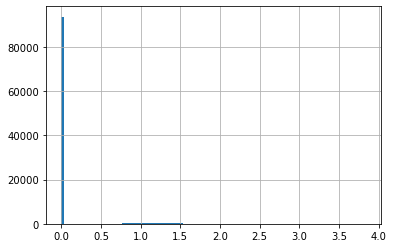

In [12]:
# add column with distance from origin
df['distance'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

# histogram of distance
df['distance'].hist(bins=100)


In [31]:
path = "output/energy_statistics_N=50.csv"
df = pd.read_csv(path, header=None)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

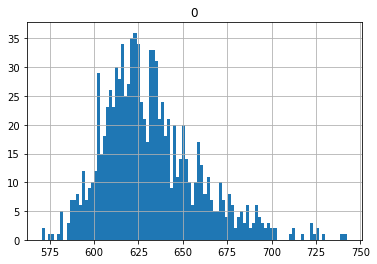

In [32]:
df.hist(bins=100)

In [33]:
print(df)

           0
0    648.488
1    626.997
2    613.108
3    632.521
4    625.392
..       ...
987  652.066
988  645.623
989  683.507
990  693.237
991  659.938

[992 rows x 1 columns]


In [34]:
# mean value
print(df.mean())
# standard deviation
print(df.std())

0    631.744416
dtype: float64
0    26.899278
dtype: float64


In [11]:
path = "output/N=50_d=3_ana_IS.csv"
df = pd.read_csv(path)

In [12]:
print(df)

     MC   N  d  alpha    energy   variance
0  1000  50  3    0.1  193.3980  403.43300
1  1000  50  3    0.2  108.8890   76.57430
2  1000  50  3    0.3   84.9877   22.90180
3  1000  50  3    0.4   76.8684    4.16608
4  1000  50  3    0.5   75.0000    0.00000
5  1000  50  3    0.6   76.3521    2.48443
6  1000  50  3    0.7   79.0054    8.43168
7  1000  50  3    0.8   83.3586   17.12780
8  1000  50  3    0.9   88.2312   29.47890
9  1000  50  3    1.0   93.6868   42.63400


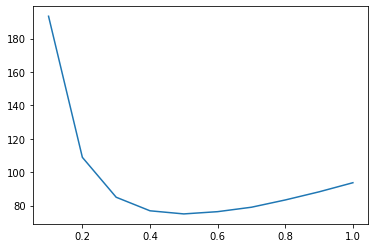

In [13]:
# plot energy against alpha
import matplotlib.pyplot as plt
plt.plot(df["alpha"], df["energy"])

https://github.com/computative/block/blob/master/python/tictoc.py

In [ ]:
# Common imports
import os

# Where to save the figures and data files
DATA_ID = "Results/EnergyMin"

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

infile = open(data_path("Energies.dat"),'r')

from numpy import log2, zeros, mean, var, sum, loadtxt, arange, array, cumsum, dot, transpose, diagonal, sqrt
from numpy.linalg import inv

def block(x):
    # preliminaries
    n = len(x)
    d = int(log2(n))
    s, gamma = zeros(d), zeros(d)
    mu = mean(x)

    # estimate the auto-covariance and variances 
    # for each blocking transformation
    for i in arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x
        s[i] = var(x)
        # perform blocking transformation
        x = 0.5*(x[0::2] + x[1::2])
   
    # generate the test observator M_k from the theorem
    M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

    # use magic to determine when we should have stopped blocking
    for k in arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)


x = loadtxt(infile)
(mean, var) = block(x) 
std = sqrt(var)
import pandas as pd
from pandas import DataFrame
data ={'Mean':[mean], 'STDev':[std]}
frame = pd.DataFrame(data,index=['Values'])

In [13]:
file = "output/interactions_gradient_N=10.csv"

df = pd.read_csv(file)


In [14]:
print(df)

      alpha  iterations
0  0.492653         144
1  0.494416         166
2  0.492770         200
3  0.491818         127
4  0.492247         130
5  0.497433          36
6  0.494844         192
7  0.495515         172
8  0.492714         142
9  0.483136          61


In [16]:
print(df["alpha"].mean())
print(df["alpha"].std())

0.49275460000000004
0.0038049328859608897


In [2]:
import matplotlib.pyplot as plt

0    0.452408
dtype: float64

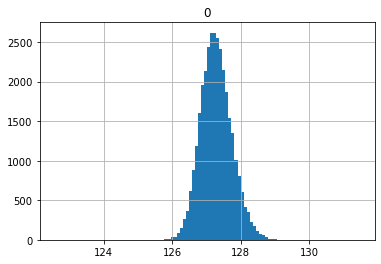

In [30]:
filename = "output/temp_energy_statistics_N=50_d=3_interactions.csv"
df = pd.read_csv(filename, header=None)
df.hist(bins=100)
df.std()


In [37]:
print(df.max())

0    106763.0
dtype: float64


0    14.365833
dtype: float64

In [4]:
import pyarma as pa


In [5]:
relative_postion = pa.mat()
relative_postion.load("output/relative_position.bin")

True

In [12]:
np.set_printoptions(suppress=True, linewidth=100000)

In [15]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [17]:
rel = np.array(relative_postion)
print(rel)


[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [1.7513195  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.   

In [24]:
print(rel)

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [1.7513195  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.   

In [27]:
mmax = -10
mmin = 99999999

for i in range(rel.shape[0]):
    for j in range(rel.shape[1]):
        if i > j:

            if rel[i,j] > mmax:
                mmax = rel[i,j]
            if rel[i,j] < mmin:
                mmin = rel[i,j]


print(mmax)
print(mmin)


4.1641702326393855
0.007238428779650793
